In [1]:
import numpy as np
import pandas as pd

import IPython.display as ipd

import librosa
import librosa.display

import matplotlib.pyplot as plt

import cv2
%matplotlib inline

In [2]:
def display_sample(file_path):
    plt.figure(figsize=(12, 4))
    data, sample_rate = librosa.load(file_path)
    print("Sample rate: ", sample_rate)
    print("min-max range: ", np.min(data), 'to', np.max(data))
    _ = librosa.display.waveplot(data, sr=sample_rate)

In [111]:
sample1 = "dataset/Accordion/Acc-ord-G#4-ff-alt1-N.wav"
sample2 = "dataset/Clarinet_Bb/ClBb-ord-D3-mff-N-N1.wav"

22050


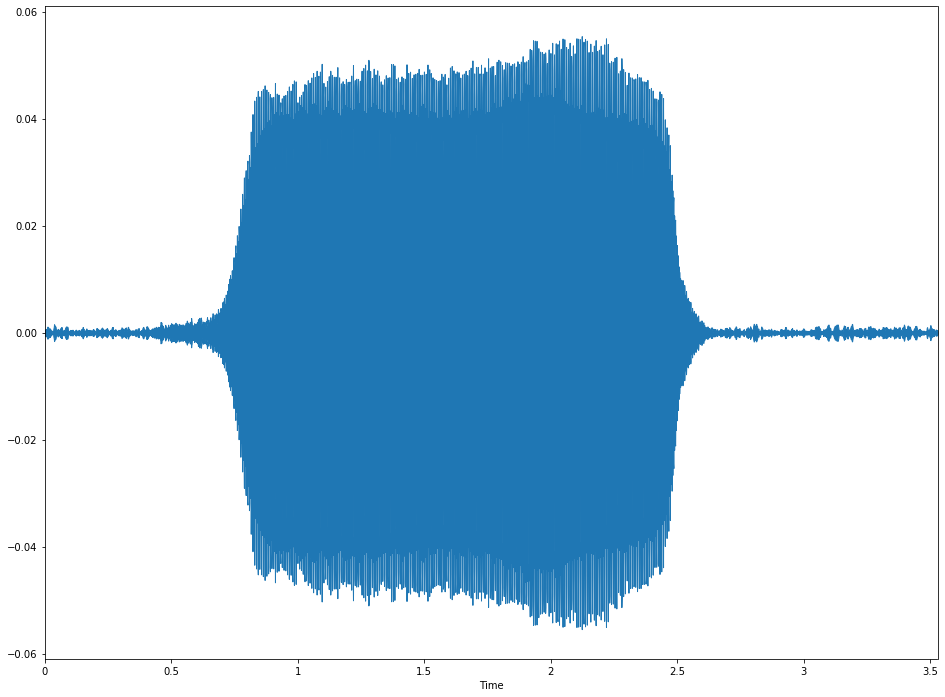

In [147]:
data, sample_rate = librosa.load(sample2)
print(sample_rate)
q = librosa.display.waveplot(data, sr=sample_rate)

[-7.8450052e-05 -1.0701717e-04 -5.6229295e-05 ... -7.6208031e-04
 -6.7790737e-04 -7.1733200e-04]
[13824 57856]


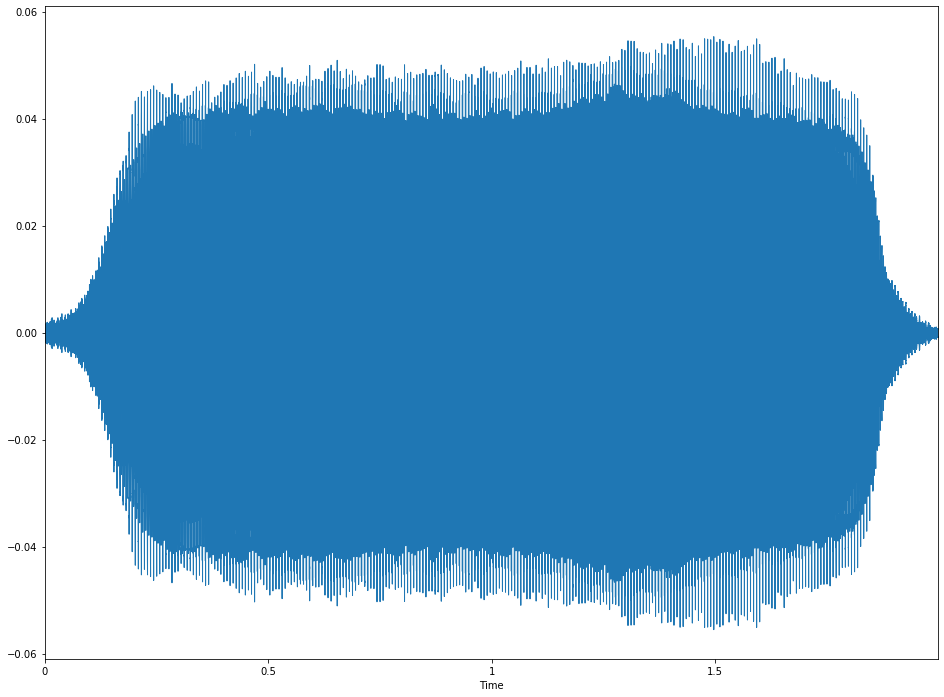

In [142]:
a, index = librosa.effects.trim(data, top_db=30)
print(a)
print(index)
b = librosa.display.waveplot(a, sr=sample_rate)

(44032,)


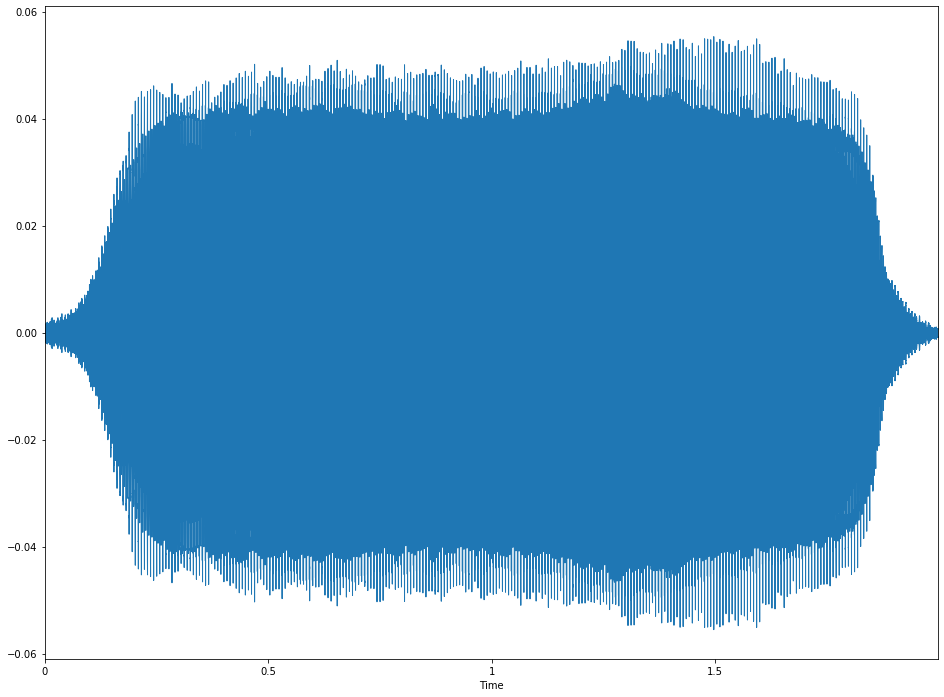

In [144]:
y_out = a[:44100]
print(y_out.shape)
librosa.display.waveplot(y_out, sr=sample_rate)

In [136]:
def extract_spectogram(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type="kaiser_fast", sr=22050)
        a, index = librosa.effects.trim(audio, top_db=30, frame_length=2048, hop_length=512)
        y_out = a[:44100]
        spectrogram = librosa.feature.melspectrogram(y=y_out, sr=sample_rate, n_fft=2048, hop_length=1024)
        #print(spectrogram)
        spec_shape = spectrogram.shape
        if(spec_shape[1] < 44):
            print(spec_shape)
            print(file_name)
        spectrogram2 = librosa.power_to_db(spectrogram, ref=np.max)
        #print(spectrogram2)
        #imarray = np.reshape(spectrogram, (128, -1, 3))
        #img_gray = np.dot(spectrogram[...,:3], [0.299, 0.587, 0.114])
        #img_resized = cv2.resize(img_gray, (128,128), interpolation=cv2.INTER_CUBIC)
        #print(img_resized.shape)
        #redgram = block_reduce(img_gray, block_size = (3,3), func = np.mean)
        #return img_gray
        #mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        #mfccscaled = np.mean(mfccs.T, axis=0)
        return spectrogram2
    
    except Exception as e:
        print(e)
        print("Error encountered while parsing file: ", file_name)
        return None
    
    #return mfccscaled  


In [137]:
folder_path = "dataset/"
folder_list = ["Accordion","Clarinet_Bb","Contrabass","Horn","Viola","Violin","Violoncello"]
features = []
onlyfiles = []

from os import listdir
from os.path import isfile, join

for folder_inst in folder_list:
    onlyfiles = onlyfiles + [f for f in listdir("dataset/" + folder_inst) if isfile(join("dataset/" + folder_inst + "/", f))]
    


for file in onlyfiles: 
    dodatak = ''
    if (file.split("-")[0] == "Acc"):
        dodatak = "Accordion"
    elif (file.split("-")[0] == "ClBb"):
        dodatak = "Clarinet_Bb"
    elif (file.split("-")[0] == "Cb"):
        dodatak = "Contrabass"
    elif (file.split("-")[0] == "Hn"):
        dodatak = "Horn"
    elif (file.split("-")[0] == "Va"):
        dodatak = "Viola"
    elif (file.split("-")[0] == "Vn"):
        dodatak = "Violin"
    elif (file.split("-")[0] == "Vc"):
        dodatak = "Violoncello"
    
    file_name = folder_path + dodatak + "/" + file
    a = file.split("-")
    instrument = a[0]
    pitch = a[2]
    if(len(pitch) == 3):
        pitch = pitch[:2]
    else:
        pitch = pitch[:1]
    data = extract_spectogram(file_name)
    features.append([file_name, data, instrument, pitch])


(128, 43)
dataset/Clarinet_Bb/ClBb-ord-A#5-mff-N-N1.wav
(128, 40)
dataset/Clarinet_Bb/ClBb-ord-A#6-mff-N-N1.wav
(128, 42)
dataset/Clarinet_Bb/ClBb-ord-A5-mff-N-N1.wav
(128, 42)
dataset/Clarinet_Bb/ClBb-ord-A6-mff-N-N1.wav
(128, 43)
dataset/Clarinet_Bb/ClBb-ord-B5-ff-N-N1.wav
(128, 42)
dataset/Clarinet_Bb/ClBb-ord-B5-fff-N-N1.wav
(128, 43)
dataset/Clarinet_Bb/ClBb-ord-C#6-ff-N-N1.wav
(128, 43)
dataset/Clarinet_Bb/ClBb-ord-C#6-fff-N-N1.wav
(128, 43)
dataset/Clarinet_Bb/ClBb-ord-C#6-mff-N-N1.wav
(128, 43)
dataset/Clarinet_Bb/ClBb-ord-D5-ff-N-N1.wav
(128, 43)
dataset/Clarinet_Bb/ClBb-ord-D5-fff-N-N1.wav
(128, 43)
dataset/Clarinet_Bb/ClBb-ord-D6-mff-N-N1.wav
(128, 42)
dataset/Clarinet_Bb/ClBb-ord-E4-ff-N-N1.wav
(128, 42)
dataset/Clarinet_Bb/ClBb-ord-E4-fff-N-N1.wav
(128, 42)
dataset/Clarinet_Bb/ClBb-ord-F#4-ff-N-N1.wav
(128, 42)
dataset/Clarinet_Bb/ClBb-ord-F#4-fff-N-N1.wav
(128, 42)
dataset/Clarinet_Bb/ClBb-ord-F#4-mff-N-N1.wav
(128, 42)
dataset/Clarinet_Bb/ClBb-ord-F#5-ff-N-N1.wav
(128, 4

In [96]:
features_df = pd.DataFrame(features, columns=["file", "feature", "instrument", "pitch"])
features_df.head()

,file,feature,instrument,pitch
0,dataset/Accordion/Acc-ord-A#3-ff-alt1-N.wav,"[[-52.58825, -56.777786, -57.523, -55.996796, ...",Acc,A#
1,dataset/Accordion/Acc-ord-A#3-ff-alt2-N.wav,"[[-50.181503, -56.613503, -52.345016, -56.9764...",Acc,A#
2,dataset/Accordion/Acc-ord-A#3-ff-N-N.wav,"[[-42.260643, -49.62692, -48.980453, -48.06945...",Acc,A#
3,dataset/Accordion/Acc-ord-A#3-mf-alt1-N.wav,"[[-45.11645, -45.512234, -51.56526, -51.519676...",Acc,A#
4,dataset/Accordion/Acc-ord-A#3-mf-alt2-N.wav,"[[-25.73967, -30.63976, -38.030777, -40.255108...",Acc,A#


In [97]:
img = extract_spectogram('dataset/Accordion/Acc-ord-D#5-mf-alt1-N.wav')

In [98]:
print(img)

[[-40.8907   -39.412796 -38.9613   ... -39.72048  -41.112007 -27.810673]
 [-35.7091   -44.247597 -37.12257  ... -42.98942  -42.6677   -27.39493 ]
 [-36.035988 -49.095875 -44.65457  ... -52.182484 -48.97761  -29.449614]
 ...
 [-76.95596  -61.83051  -50.96092  ... -54.306683 -54.15907  -51.34105 ]
 [-79.616844 -65.24066  -53.114506 ... -56.10187  -55.91107  -51.514805]
 [-80.       -80.       -80.       ... -80.       -80.       -55.26494 ]]


In [99]:
import numpy as np
import cv2 # OpenCV biblioteka
import matplotlib
import matplotlib.pyplot as plt  
# iscrtavanje slika i grafika unutar samog browsera
%matplotlib inline 
# prikaz vecih slika 
matplotlib.rcParams['figure.figsize'] = 16,12

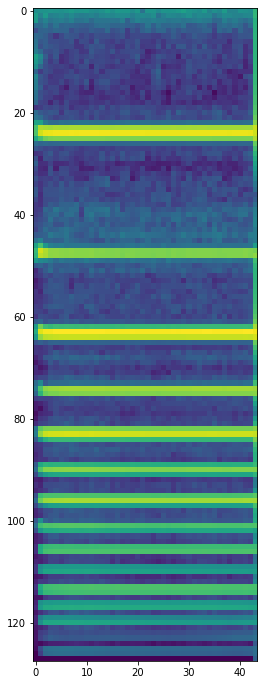

In [100]:
plt.imshow(img)

In [57]:
print(img.shape)
print(img.dtype)

(128, 44)
float32


In [67]:
def my_rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1]))  # zauzimanje memorije za sliku (nema trece dimenzije)
    img_gray = 0.21*img_rgb[:, :] + 0.72*img_rgb[:, :] #+ 0.07*img_rgb[:, :, 2]
#     img_gray = img_gray.astype('uint8')  # u prethodnom koraku smo mnozili sa float, pa sada moramo da vratimo u [0,255] opseg
    return img_gray

In [69]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

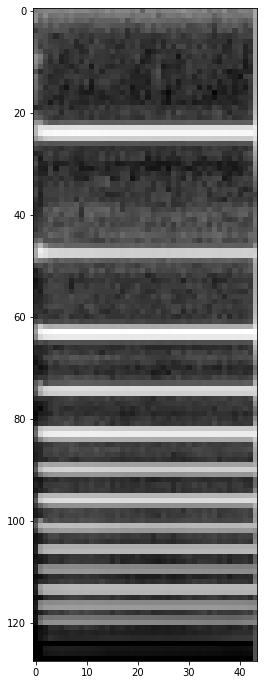

In [76]:
img_gray = my_rgb2gray(data)
plt.imshow(img_gray, 'gray')

In [77]:
def normalize_gray(array):
    return (array - array.min())/(array.max() - array.min())

In [78]:
normgram = normalize_gray(img_gray)

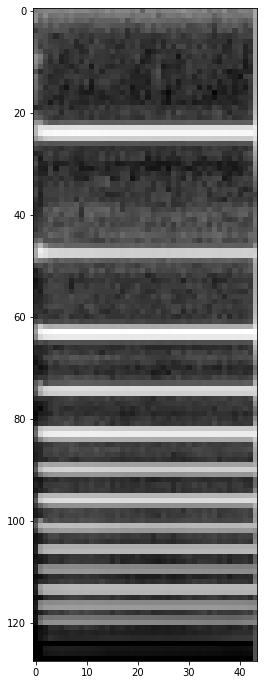

In [80]:
plt.imshow(normgram, 'gray')

In [156]:
folder_path = "dataset/"
folder_list = ["Accordion","Clarinet_Bb","Contrabass","Horn","Viola","Violin","Violoncello"]
features = []
onlyfiles = []

from os import listdir
from os.path import isfile, join

for folder_inst in folder_list:
    onlyfiles = onlyfiles + [f for f in listdir("dataset/" + folder_inst) if isfile(join("dataset/" + folder_inst + "/", f))]
    


for file in onlyfiles: 
    dodatak = ''
    if (file.split("-")[0] == "Acc"):
        dodatak = "Accordion"
    elif (file.split("-")[0] == "ClBb"):
        dodatak = "Clarinet_Bb"
    elif (file.split("-")[0] == "Cb"):
        dodatak = "Contrabass"
    elif (file.split("-")[0] == "Hn"):
        dodatak = "Horn"
    elif (file.split("-")[0] == "Va"):
        dodatak = "Viola"
    elif (file.split("-")[0] == "Vn"):
        dodatak = "Violin"
    elif (file.split("-")[0] == "Vc"):
        dodatak = "Violoncello"
    
    file_name = folder_path + dodatak + "/" + file
    a = file.split("-")
    instrument = a[0]
    pitch = a[2]
    if(len(pitch) == 3):
        pitch = pitch[:2]
    else:
        pitch = pitch[:1]
    data = extract_spectogram(file_name)
    img_gray = my_rgb2gray(data)
    normgram = normalize_gray(img_gray)
    features.append([file_name, normgram, instrument, pitch])

In [146]:
features_df = pd.DataFrame(features, columns=["file", "feature", "instrument", "pitch"])
features_df.head()

,file,feature,instrument,pitch
0,dataset/Accordion/Acc-ord-A#3-ff-alt1-N.wav,"[[0.29073387, 0.33191147, 0.2776536, 0.2996274...",Acc,A#
1,dataset/Accordion/Acc-ord-A#3-ff-alt2-N.wav,"[[0.3070023, 0.3617015, 0.27213687, 0.36119562...",Acc,A#
2,dataset/Accordion/Acc-ord-A#3-ff-N-N.wav,"[[0.47353348, 0.42426324, 0.3613015, 0.4068834...",Acc,A#
3,dataset/Accordion/Acc-ord-A#3-mf-alt1-N.wav,"[[0.42782307, 0.46233648, 0.38736117, 0.385382...",Acc,A#
4,dataset/Accordion/Acc-ord-A#3-mf-alt2-N.wav,"[[0.6518973, 0.62134737, 0.5658642, 0.48233718...",Acc,A#


In [150]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [155]:
for f in features[:50]:
    print(f)

['dataset/Accordion/Acc-ord-A#3-ff-alt1-N.wav', array([[0.29073387, 0.33191147, 0.2776536 , ..., 0.2983791 , 0.31020713,
        0.49303234],
       [0.3264537 , 0.27282915, 0.24930954, ..., 0.24244949, 0.3196552 ,
        0.47897318],
       [0.32555646, 0.24986543, 0.20688719, ..., 0.12366305, 0.26892763,
        0.47309694],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05352533],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04500348],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04065749]], dtype=float32), 'Acc', 'A#']
['dataset/Accordion/Acc-ord-A#3-ff-alt2-N.wav', array([[0.3070023 , 0.3617015 , 0.27213687, ..., 0.22827241, 0.24144967,
        0.64770633],
       [0.3246074 , 0.3109575 , 0.22192252, ..., 0.2622391 , 0.25598556,
        0.651827  ],
       [0.3542471 , 0.34863842, 0.20194659, ..., 0.19149923, 0.23241222,
        0.6556373 ],
       ...,
    

In [158]:
X = np.array(features_df.feature)
y = np.array(features_df.pitch)

le = LabelEncoder()
yy = le.fit_transform(y)

In [159]:
X

array([array([[0.29073387, 0.33191147, 0.2776536 , ..., 0.2983791 , 0.31020713,
        0.49303234],
       [0.3264537 , 0.27282915, 0.24930954, ..., 0.24244949, 0.3196552 ,
        0.47897318],
       [0.32555646, 0.24986543, 0.20688719, ..., 0.12366305, 0.26892763,
        0.47309694],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05352533],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04500348],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04065749]], dtype=float32),
       array([[0.3070023 , 0.3617015 , 0.27213687, ..., 0.22827241, 0.24144967,
        0.64770633],
       [0.3246074 , 0.3109575 , 0.22192252, ..., 0.2622391 , 0.25598556,
        0.651827  ],
       [0.3542471 , 0.34863842, 0.20194659, ..., 0.19149923, 0.23241222,
        0.6556373 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
     

In [161]:
y

array(['A#', 'A#', 'A#', ..., 'G', 'G', 'G'], dtype=object)

In [162]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, shuffle=True, random_state=42)

In [166]:
len(x_train)

1174

In [167]:
len(x_test)

294

In [168]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical

Using TensorFlow backend.


In [169]:
num_classes = 12
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

(294,)